In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the folder containing images
folder_path = '/content/dataset'

# Define the output folder for processed images
output_folder = '/content/light_rings_removed'
os.makedirs(output_folder, exist_ok=True)

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(('.png')):  # Check for image files
        image_path = os.path.join(folder_path, filename)

        # Load the image
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Threshold to create a mask for the bright spots (light rings)
        _, mask = cv2.threshold(image, 185, 255, cv2.THRESH_BINARY)

        # Dilate the mask to cover a larger area
        kernel = np.ones((4, 4), np.uint8)  # Adjust the kernel size for more dilation
        dilated_mask = cv2.dilate(mask, kernel, iterations=2)

        # Inpainting to remove the bright spots
        inpainted_image = cv2.inpaint(image, dilated_mask, inpaintRadius=10, flags=cv2.INPAINT_TELEA)

        # Enhance the contrast of the inpainted image
        result = cv2.normalize(inpainted_image, None, 0, 255, cv2.NORM_MINMAX)

        # Save the processed image
        output_path = os.path.join(output_folder, f'inpainted_{filename}')
        cv2.imwrite(output_path, result)

        # Optionally display the result
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.title("Original Image")
        plt.imshow(image, cmap='gray')

        plt.subplot(1, 2, 2)
        plt.title("Inpainted Image")
        plt.imshow(result, cmap='gray')
        plt.show()


Processed and saved: /content/denoised_output_images/denoised_image_274.png


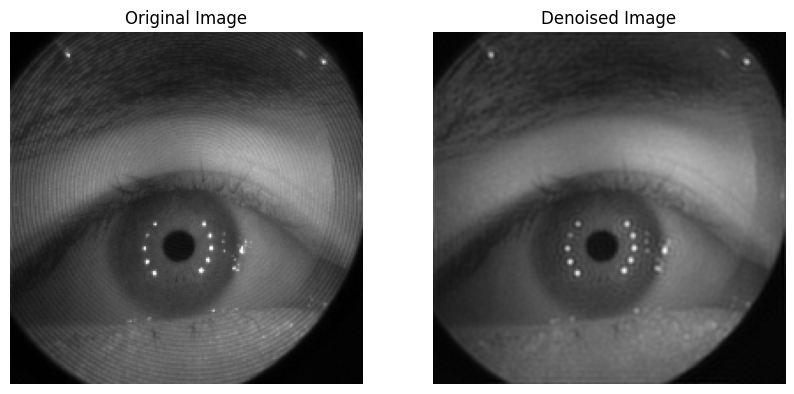

Processed and saved: /content/denoised_output_images/denoised_image_313.png


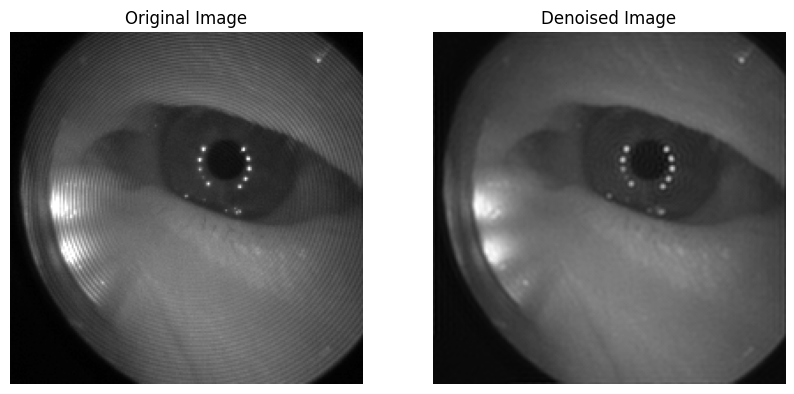

Processed and saved: /content/denoised_output_images/denoised_image_279.png


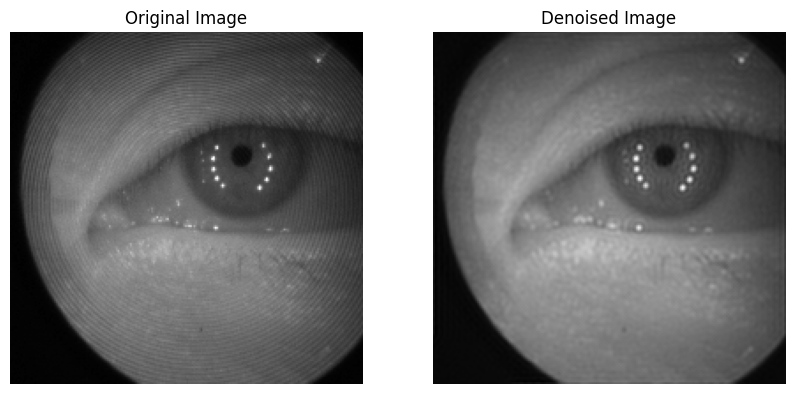

Processed and saved: /content/denoised_output_images/denoised_image_168.png


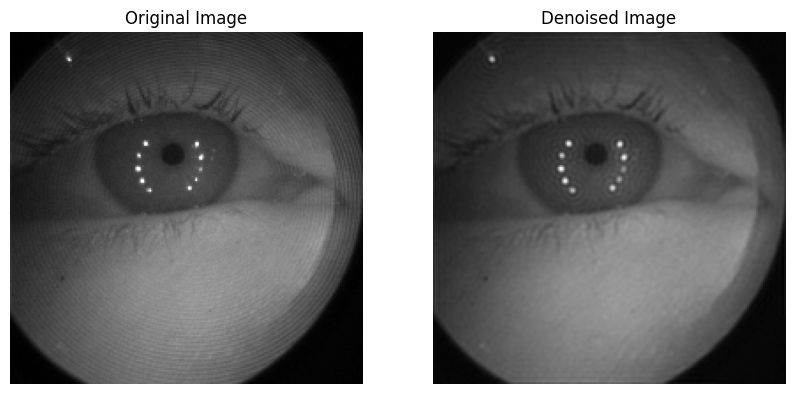

Processed and saved: /content/denoised_output_images/denoised_image_237.png


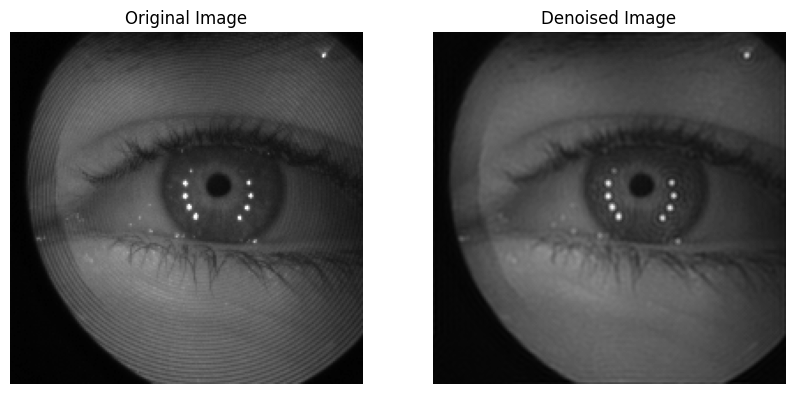

Processed and saved: /content/denoised_output_images/denoised_image_126.png


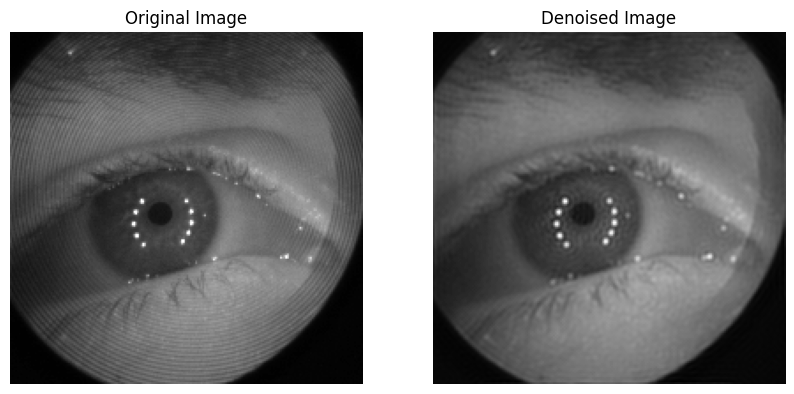

Processed and saved: /content/denoised_output_images/denoised_image_176.png


KeyboardInterrupt: 

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

def create_ring_mask(shape, inner_radius, outer_radius):
    rows, cols = shape
    center = (rows // 2, cols // 2)
    Y, X = np.ogrid[:rows, :cols]
    distance = np.sqrt((X - center[1]) ** 2 + (Y - center[0]) ** 2)
    mask = np.logical_and(distance >= inner_radius, distance <= outer_radius)
    return ~mask  # Invert the mask to keep the regions outside the ring

def denoise_image(img_path, inner_radius, outer_radius):
    # Load the image
    img = cv.imread(img_path, 0)

    # Perform FFT and shift the zero frequency to the center
    fourier_transform = np.fft.fft2(img)
    center_shift = np.fft.fftshift(fourier_transform)

    # Create a ring mask
    ring_mask = create_ring_mask(img.shape, inner_radius, outer_radius)

    # Apply the ring mask
    center_shift *= ring_mask

    # Perform the inverse FFT to get the denoised image
    f_ishift = np.fft.ifftshift(center_shift)
    denoised_image = np.fft.ifft2(f_ishift)
    denoised_image = np.real(denoised_image)

    return img, denoised_image

def process_folder(input_folder, output_folder, inner_radius=60, outer_radius=120):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Loop through all files in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            img_path = os.path.join(input_folder, filename)
            original_image, denoised_image = denoise_image(img_path, inner_radius, outer_radius)

            # Save the denoised image
            output_path = os.path.join(output_folder, f"denoised_{filename}")
            cv.imwrite(output_path, denoised_image)
            print(f"Processed and saved: {output_path}")

            # Show side-by-side comparison
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.title("Original Image")
            plt.imshow(original_image, cmap='gray')
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.title("Denoised Image")
            plt.imshow(denoised_image, cmap='gray')
            plt.axis('off')

            plt.show()

# Define input and output folders
input_folder = '/content/dataset'  # Change to your input folder path
output_folder = '/content/denoised_output_images'  # Change to your desired output folder path

# Process the images in the input folder and save them to the output folder
process_folder(input_folder, output_folder)
